In [2]:
%matplotlib notebook
import csv
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
import scipy.constants as c

In [66]:
cd "\\linna\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1006_16 1D Grid - Al - Burdiscope\s1006_16 Burdiscope"

\\linna\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1006_16 1D Grid - Al - Burdiscope\s1006_16 Burdiscope


In [67]:
#zero=bk=plt.imread('s1013_16_134635_c1.png')
bk=plt.imread('s1006_16_135105_c1.png')
sh=plt.imread('s1006_16_135555_c1.png')

<IPython.core.display.Javascript object>


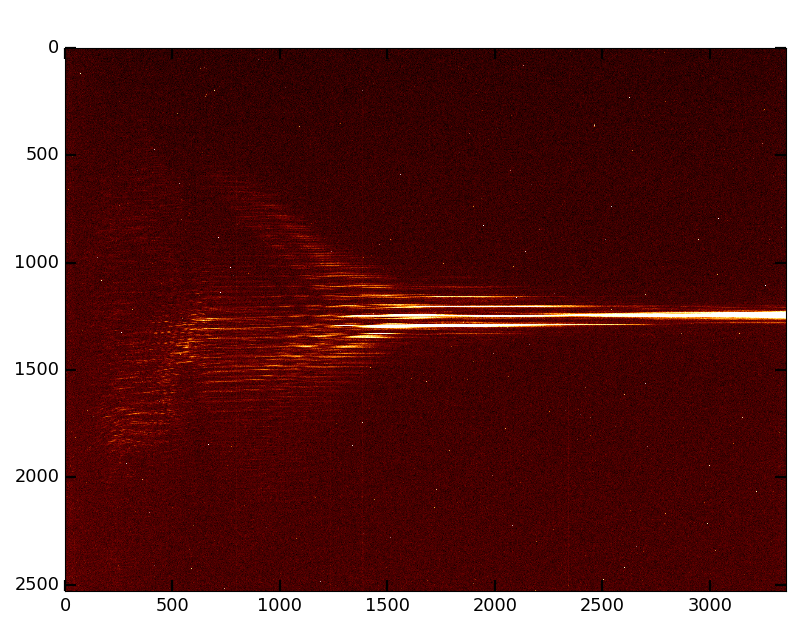

In [55]:
fig, ax=plt.subplots(figsize=(10,8))
ax.imshow(sh, cmap='afmhot', clim=[0.005,0.015])
ax.tick_params(labelsize=16, pad=5, length=10, width=2)

fig.tight_layout()

In [71]:
cd "~\Google Drive\MAGPIE\data\2016\Burdiscope for Sergey"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\Burdiscope for Sergey


In [57]:
fig.savefig('s1013_16 W grid Burdiscope.png', dpi=300,bbox_inches='tight')

<IPython.core.display.Javascript object>


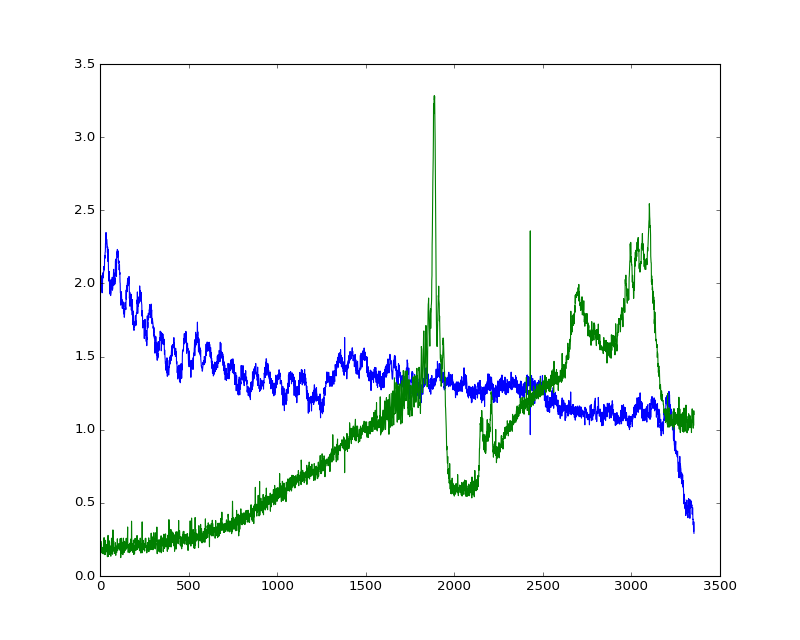

(0, 3.5)

In [102]:
fig, ax=plt.subplots(figsize=(10,8))
ax.plot((bk-zero).sum(axis=0))
ax.plot((sh-zero).sum(axis=0))
ax.set_ylim([0,None])

<IPython.core.display.Javascript object>


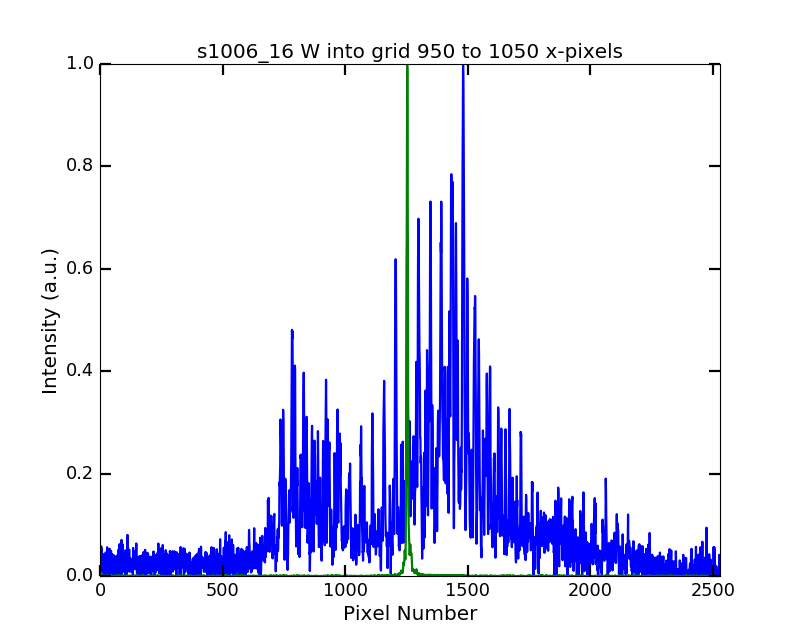

In [69]:
i=1000
win=50
s=(sh-zero)[:,i-win:i+win].mean(axis=1)
b=(bk-zero)[:,i-win:i+win].mean(axis=1)

fig, ax=plt.subplots(figsize=(10,8))
ax.plot(s/s.max(), lw=2, label='Shot')
ax.plot(b/b.max(), lw=2, label='Vacuum')
ax.set_ylim([0,1])
ax.set_xlim([0, bk.shape[0]])
ax.set_ylabel('Intensity (a.u.)', fontsize=18)
ax.set_xlabel('Pixel Number', fontsize=18)
ax.tick_params(labelsize=16, pad=5, length=10, width=2)
ax.set_title('s1006_16 W into grid '+str(i-win)+' to '+str(i+win)+' x-pixels', fontsize=18)

In [72]:
fig.savefig('s1006_16 W into grid Burdiscope lineouts.png', dpi=300,bbox_inches='tight')

<IPython.core.display.Javascript object>


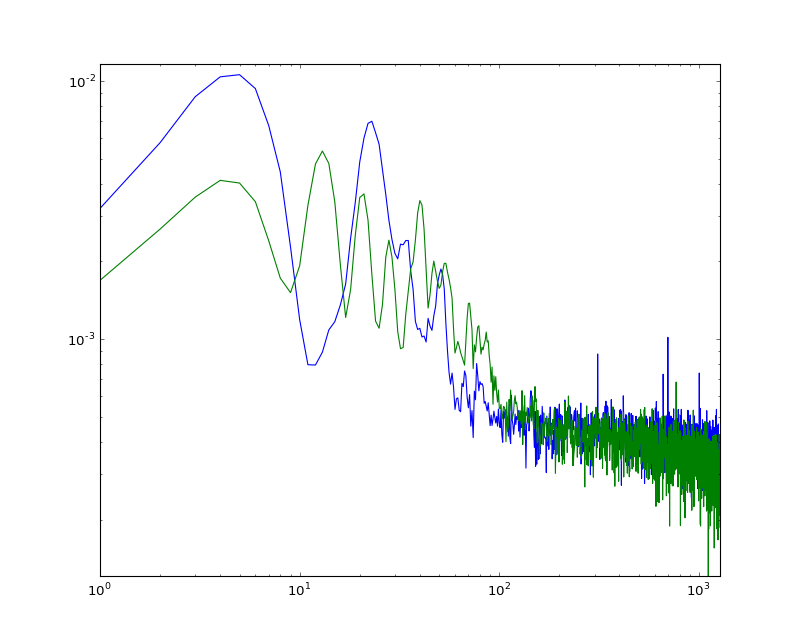

(1.0, 1275)

In [108]:
pk=b.argmax()
sl=s[:pk][::-1]
sr=s[pk:]
xl=np.arange(sl.size,0,-1)[::-1]
xr=np.arange(0,sr.size)

fig, ax=plt.subplots(figsize=(10,8))
ax.loglog(xl,sl)
ax.loglog(xr,sr)
ax.set_ylim([min(sr.min(),sl.min()), max(sr.max(), sl.max())*1.1])
ax.set_xlim([0, max(sl.size,sr.size)])

<IPython.core.display.Javascript object>


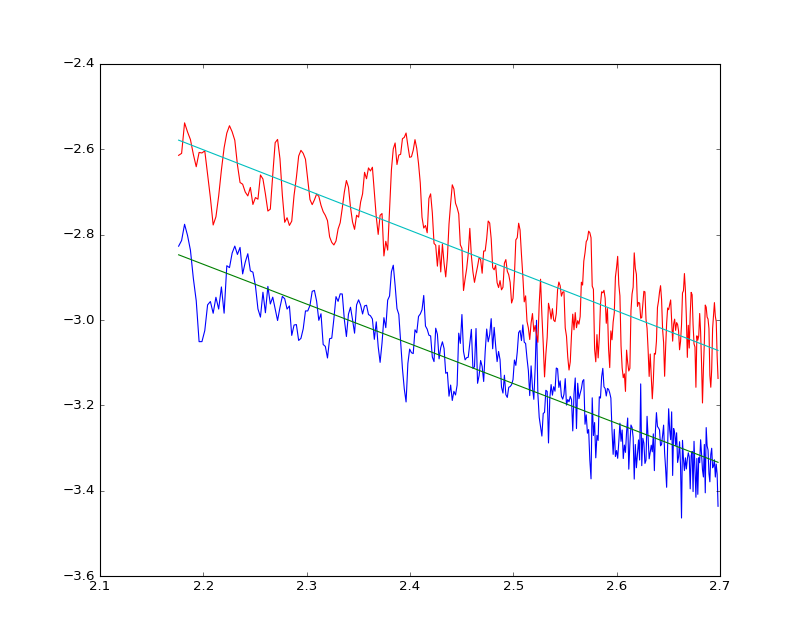

-0.931671819754 -0.944219884394


In [106]:
fmin=150
fmax=500


LogSr=np.nan_to_num(np.log10(sr[fmin:fmax]))
LogXr=np.log10(np.arange(fmin,fmax))
coefficientsr = np.polyfit(LogXr, LogSr, 1)
polynomialr = np.poly1d(coefficientsr)
ysr = polynomialr(LogXr)

LogSl=np.nan_to_num(np.log10(sl[fmin:fmax]))
LogXl=np.log10(np.arange(fmin,fmax))
coefficientsl = np.polyfit(LogXl, LogSl, 1)
polynomiall = np.poly1d(coefficientsl)
ysl = polynomiall(LogXl)

fig, ax=plt.subplots(figsize=(10,8))
ax.plot(LogXr, LogSr)
ax.plot(LogXr, ysr)
ax.plot(LogXl, LogSl)
ax.plot(LogXl, ysl)

print(coefficientsr[0],coefficientsl[0])

In [73]:
coefficients

array([ 0.05585181, -3.84406319])

In [136]:
cd '..'

\\linna\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1011_16 2D Grid - W - Burdiscope


In [159]:
shadow=plt.imread('s1011_16 IR Shadowgraphy (2).JPG')
shadow=shadow.sum(axis=2)

<IPython.core.display.Javascript object>


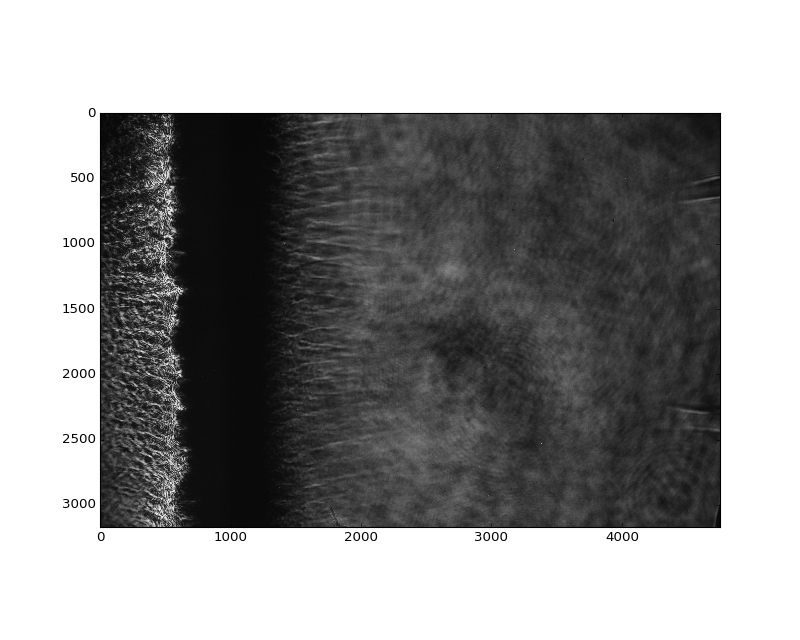

In [219]:
fig, ax=plt.subplots(figsize=(10,8))
ax.imshow(shadow, cmap='gray')

<IPython.core.display.Javascript object>


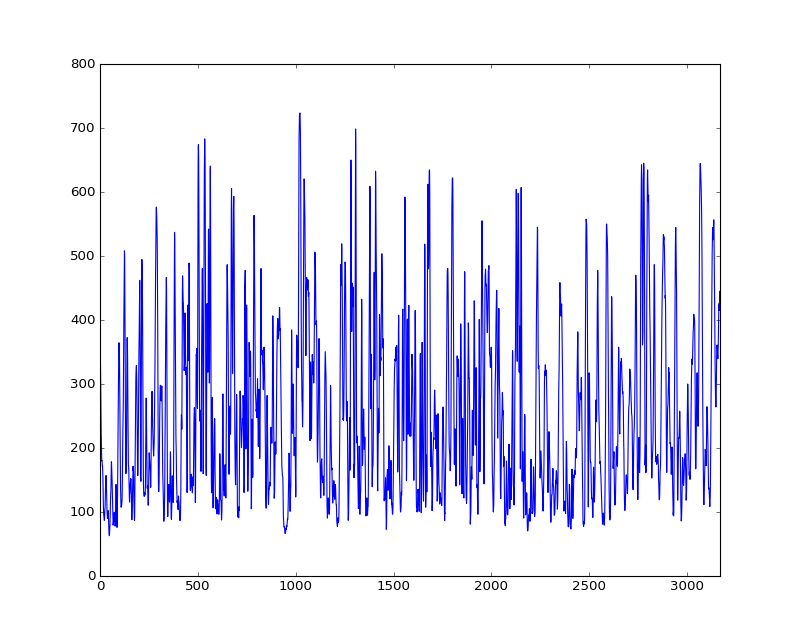

(0, 3168)

In [176]:
i=442
win=1
ss=shad[:,i-win:i+win].mean(axis=1)
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(ss)
ax.set_xlim([0, shadow.shape[0]])

<IPython.core.display.Javascript object>


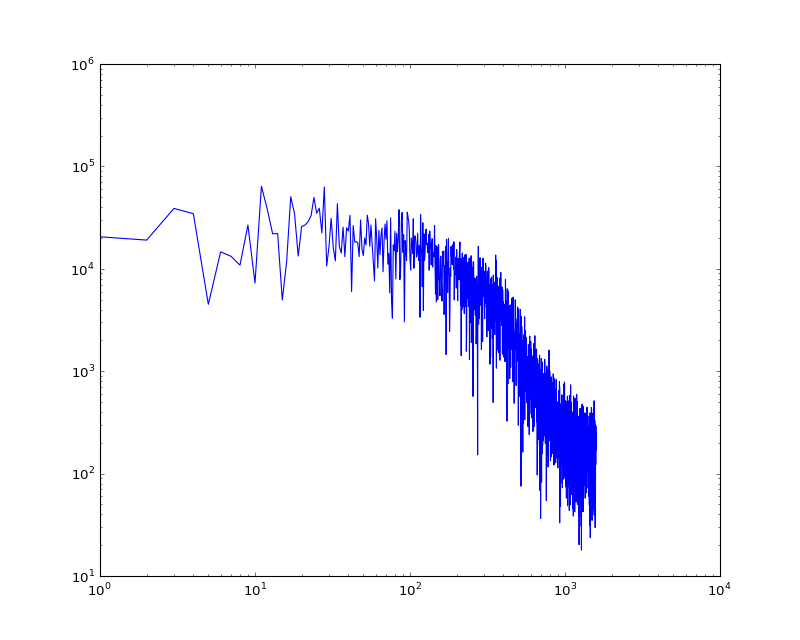

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [217]:
sft=np.fft.fft(ss)
sftr=np.abs(sft)
fig, ax=plt.subplots(figsize=(10,8))
ax.loglog(sftr[0:sftr.size/2])
#ax.set_xlim([100,2000])

<IPython.core.display.Javascript object>


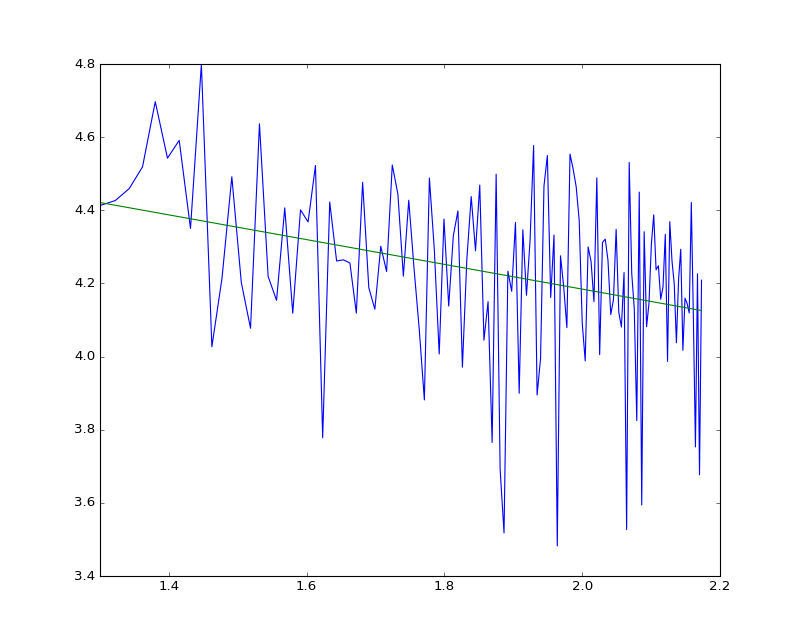

In [221]:
fmin=20
fmax=150
Logsh=np.log10(sftr[fmin:fmax])
LogX=np.log10(np.arange(fmin,fmax))
coefficients = np.polyfit(LogX, Logsh, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(LogX)
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(LogX, Logsh)
ax.plot(LogX, ys)

In [222]:
polynomial

poly1d([-0.33831557,  4.8610735 ])

In [188]:
np.logspace?

In [101]:
from scipy.signal import deconvolve

In [128]:
d=deconvolve(s,b[1357-20:1357+20])

<IPython.core.display.Javascript object>


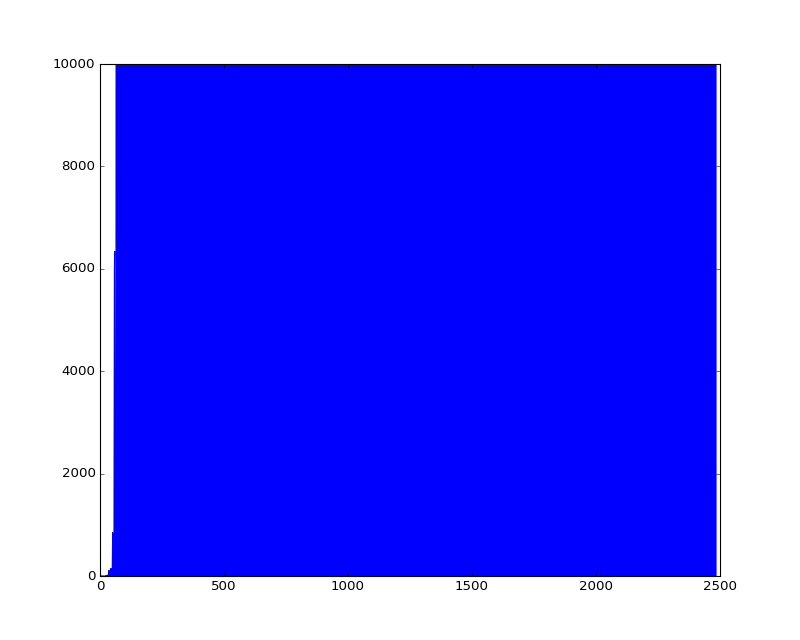

(0, 10000)

In [127]:
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(d[0])
#ax.set_ylim([s.min(), s.max()*1.1])
ax.set_ylim([0, 10000])

In [129]:
d[0]

array([  7.54138029e-001,  -6.03978999e-002,   3.92522932e-002, ...,
         1.13230214e+196,   1.47350166e+196,   1.32857492e+196])

In [113]:
s.shape

(2529,)